In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
df = pd.read_csv("Downloads/weatherHistory.csv")
df.isnull().any()

Formatted Date              False
Summary                     False
Precip Type                 False
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

In [2]:
#Replace every nan values with 0
df.fillna(value=0,axis=1,inplace=True)
df.shape

(96453, 12)

In [4]:
from sklearn.model_selection import train_test_split 
train, test = train_test_split(df,test_size=0.30)
train.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
10241,2007-08-09 17:00:00.000 +0200,Partly Cloudy,rain,30.811111,30.100000,0.35,10.8514,87.0,11.4471,0.0,1005.09,Partly cloudy throughout the day.
20050,2008-02-20 10:00:00.000 +0100,Clear,rain,6.938889,6.938889,0.62,0.8372,206.0,7.7280,0.0,1027.66,Foggy in the morning.
92028,2016-07-08 15:00:00.000 +0200,Mostly Cloudy,rain,27.777778,26.861111,0.28,4.6368,195.0,16.1000,0.0,1019.18,Partly cloudy starting in the morning.
62508,2013-08-24 12:00:00.000 +0200,Mostly Cloudy,rain,24.800000,24.800000,0.40,9.7244,19.0,10.2557,0.0,1013.95,Mostly cloudy throughout the day.
95017,2016-10-10 05:00:00.000 +0200,Foggy,rain,1.677778,1.677778,0.96,3.1556,334.0,2.7853,0.0,1022.79,Foggy in the morning.


In [8]:
from sklearn.linear_model import LogisticRegression
#Fill the training and test data with require information
X_train = train['Humidity'].dropna().values.reshape((-1, 1))
y_train = train['Temperature (C)'].dropna()
X_test = test['Humidity'].dropna().values.reshape((-1, 1))
y_test = test['Temperature (C)'].dropna()

In [9]:
from sklearn import linear_model# compute classification accuracy for the linear regression model
from sklearn import metrics # for the check the error and accuracy of the model
lin = linear_model.LinearRegression()
# train the model on the training set
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
lin_score_train = lin.score(X_test, y_test)
lin_score_test = lin.score(X_train, y_train)
print("Training score: ",lin_score_train)
print("Testing score: ",lin_score_test)

Training score:  0.39174745227279484
Testing score:  0.4031144870210867


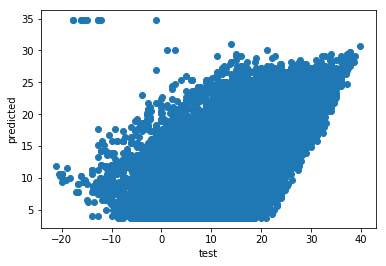

In [13]:
import matplotlib.pyplot as plt
predictions = lin.predict(X_test)

plt.scatter(y_test,predictions)
plt.xlabel("test")
plt.ylabel("predicted")
plt.show()